#### 이상치 처리의 한계와 제약 사항


- 정의의 주관성 : 이상치 상황에 따라서 다르게 정의될 수 있음 = 주관적인 판단이 포함

- 감지의 어려움 : 드물거나 예상치 못한 패턴을 가지는 이상치는 감지하기 어려움

- 처리의 영향 : 이상치 처리는 데이터의 특성을 변경하고 왜곡할 수 있음

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#### 1. 데이터 생성

In [16]:
# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range (start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10 # 정규 분포를 따르는 데이터 생성

# 이상치 생성
values[20] = 50 # 이상치 추가

# 데이터프레임 생성
data = pd.DataFrame({'Date': dates, 'Value': values})
print(data)
print("이상치 데이터 추가 확인 체크 >> ", data['Value'].iloc[20])

         Date      Value
0  2023-01-01   4.967142
1  2023-01-02  -1.382643
2  2023-01-03   6.476885
3  2023-01-04  15.230299
4  2023-01-05  -2.341534
..        ...        ...
95 2023-04-06 -14.635149
96 2023-04-07   2.961203
97 2023-04-08   2.610553
98 2023-04-09   0.051135
99 2023-04-10  -2.345871

[100 rows x 2 columns]
이상치 데이터 추가 확인 체크 >>  50.0


#### 2. 이상치 탐지 및 보간 확인

In [17]:
# Z-score 이상치 탐지
z_socre = np.abs(stats.zscore(data['Value']))

# 임계치 설정
threashold = 3

# Z-score 임게값을 초과하는지 체크
outliers = z_socre > threashold

# 이상치를 결측치로 처리
data.loc[outliers, 'Value'] = np.nan

# 결측치 보간
data['Value'] = data['Value'].interpolate()

# 처리된 데이터 확인
print(data['Value'].iloc[20])

-8.190400009109137


#### 3. 시각화

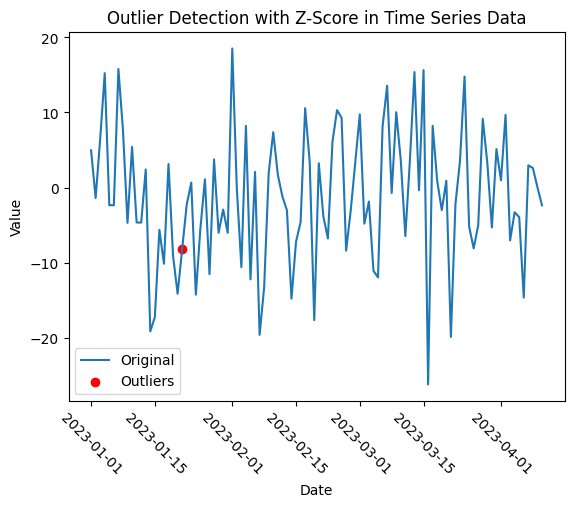

In [19]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=-45)
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()
plt.show()

- 이상치가 시각적으로 구분되며, 이상치를 제외한 데이터는 보간 과정을 통해 빈 공간이 채워져 부드러운 곡선을 형성
- 처리된 데이터를 확인하면, 이상치가 결측치로 처리되고 보간된 값으로 대체 된 것을 확인 할 수 있음